# FORD GOBIKE SYSTEM DATA
   ### _by Nandhitha_

> Over the past decade, bicycle-sharing systems are growing in variety and recognition in cities across the globe. Bicycle-sharing systems enable users to rent bicycles for brief visits, usually half-hour or less. 

>Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company.

>Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Nandhitha\Desktop\udacity\project5\201904-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,No
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,No
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,No


In [3]:
df.shape

(239111, 14)

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,239111.000000,239047.000000,239111.000000,239111.000000,239047.000000,239111.000000,239111.000000,239111.000000
mean,802.671199,141.836538,37.769536,-122.352503,140.838099,37.766996,-122.343420,3666.956493
std,1990.006091,116.289776,0.127698,0.277088,116.386168,0.343083,1.068144,2180.717333
min,61.000000,3.000000,0.000000,-122.453704,3.000000,0.000000,-122.453704,11.000000
25%,349.000000,47.000000,37.770083,-122.413004,44.000000,37.770407,-122.411738,1720.000000
50%,558.000000,104.000000,37.780760,-122.398285,102.000000,37.780955,-122.397437,3471.000000
75%,876.000000,240.000000,37.797280,-122.291209,239.000000,37.797320,-122.291376,5749.000000
max,86114.000000,420.000000,37.880222,0.000000,420.000000,37.880222,0.000000,7108.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239111 entries, 0 to 239110
Data columns (total 14 columns):
duration_sec               239111 non-null int64
start_time                 239111 non-null object
end_time                   239111 non-null object
start_station_id           239047 non-null float64
start_station_name         239047 non-null object
start_station_latitude     239111 non-null float64
start_station_longitude    239111 non-null float64
end_station_id             239047 non-null float64
end_station_name           239047 non-null object
end_station_latitude       239111 non-null float64
end_station_longitude      239111 non-null float64
bike_id                    239111 non-null int64
user_type                  239111 non-null object
bike_share_for_all_trip    239111 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 25.5+ MB


In [6]:
new_df = df.copy()
new_df = new_df[new_df['start_station_id'].isnull() == False]

In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239047 entries, 0 to 239110
Data columns (total 14 columns):
duration_sec               239047 non-null int64
start_time                 239047 non-null object
end_time                   239047 non-null object
start_station_id           239047 non-null float64
start_station_name         239047 non-null object
start_station_latitude     239047 non-null float64
start_station_longitude    239047 non-null float64
end_station_id             239047 non-null float64
end_station_name           239047 non-null object
end_station_latitude       239047 non-null float64
end_station_longitude      239047 non-null float64
bike_id                    239047 non-null int64
user_type                  239047 non-null object
bike_share_for_all_trip    239047 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 27.4+ MB


In [8]:
new_df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
bike_share_for_all_trip    0
dtype: int64

In [9]:
new_df.nunique()

duration_sec                 5726
start_time                 239028
end_time                   239025
start_station_id              357
start_station_name            357
start_station_latitude        357
start_station_longitude       357
end_station_id                358
end_station_name              358
end_station_latitude          358
end_station_longitude         358
bike_id                      4510
user_type                       2
bike_share_for_all_trip         2
dtype: int64

In [10]:
new_df.duplicated().sum()

0

In [11]:
new_df['user_type'].value_counts()

Subscriber    203185
Customer       35862
Name: user_type, dtype: int64

In [12]:
new_df['bike_share_for_all_trip'].value_counts()

No     218407
Yes     20640
Name: bike_share_for_all_trip, dtype: int64

In [123]:
# data wrangling issue1: convert features to appropriate datatypes 

new_df['start_time'] = pd.to_datetime(new_df['start_time'])
new_df['end_time'] = pd.to_datetime(new_df['end_time'])

new_df['start_station_id'] = new_df['start_station_id'].astype('str')
new_df['end_station_id'] = new_df['end_station_id'].astype('str')
new_df['bike_id'] = new_df['bike_id'].astype('str')

new_df['user_type'] = new_df['user_type'].astype('category')

In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239047 entries, 0 to 239110
Data columns (total 14 columns):
duration_sec               239047 non-null int64
start_time                 239047 non-null datetime64[ns]
end_time                   239047 non-null datetime64[ns]
start_station_id           239047 non-null object
start_station_name         239047 non-null object
start_station_latitude     239047 non-null float64
start_station_longitude    239047 non-null float64
end_station_id             239047 non-null object
end_station_name           239047 non-null object
end_station_latitude       239047 non-null float64
end_station_longitude      239047 non-null float64
bike_id                    239047 non-null object
user_type                  239047 non-null category
bike_share_for_all_trip    239047 non-null object
dtypes: category(1), datetime64[ns](2), float64(4), int64(1), object(6)
memory usage: 25.8+ MB


In [125]:
# data wrangling issue2: create new featues to help in analysis

new_df['start_date'] = new_df.start_time.dt.strftime('%Y-%m-%d')

new_df['month_of_trip'] = new_df.start_time.dt.strftime('%B')

new_df['day_of_week']= new_df['start_time'].dt.strftime('%A')

new_df['trip_hour']= new_df['start_time'].dt.hour

new_df['trip_duration_minute'] = new_df['duration_sec']/60

In [16]:
new_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_date,month_of_trip,day_of_week,trip_hour,trip_duration_minute
0,50305,2019-04-30 22:33:55.155,2019-05-01 12:32:20.454,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,No,2019-04-30,April,Tuesday,22,838.416667
1,53725,2019-04-30 20:43:41.632,2019-05-01 11:39:06.917,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,No,2019-04-30,April,Tuesday,20,895.416667
2,78072,2019-04-30 10:32:46.489,2019-05-01 08:13:58.975,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,No,2019-04-30,April,Tuesday,10,1301.200000
3,78969,2019-04-30 10:00:51.550,2019-05-01 07:57:01.262,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,No,2019-04-30,April,Tuesday,10,1316.150000
4,1128,2019-04-30 23:59:04.739,2019-05-01 00:17:53.091,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,No,2019-04-30,April,Tuesday,23,18.800000


In [17]:
new_df.shape

(239047, 19)

In [35]:
new_df['month_of_trip'].value_counts()

April    239047
Name: month_of_trip, dtype: int64

In [19]:
new_df['day_of_week'].value_counts()

Tuesday      43598
Monday       40906
Wednesday    38850
Thursday     38845
Friday       35450
Saturday     23056
Sunday       18342
Name: day_of_week, dtype: int64

 **Our wrangled dataset contains nearly 230000+ records relevant to the bike trips characterized by 19 distinct features.**

 The dataset contains features about :


* **trip duration:** how long the trip took in seconds (duration_sec, start_time, end_time)


* **trip timings:** start/end date/time for the bike rides (start_time, end_time)


* **station info:** start/end station, name, geolocation (start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude)


* **customer info:** type of member (user_type)


* **bikeshare info:** info related to the rented bike (bike id, bike_share_for_all_trip)

New features that were derived for furthur exploration and analysis:

* **trip info:** (start_date, month_of_trip, day_of_week, trip_hour, trip_duration_minute)

## Univariate Exploration

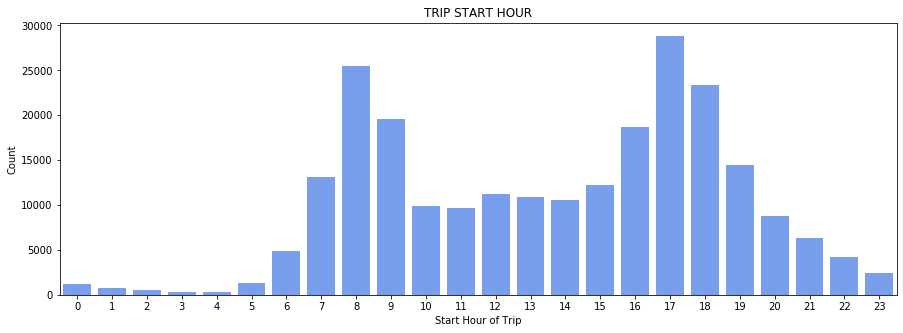

In [27]:
#figure1
plt.subplots(figsize = (15,5))
sns.countplot(data=new_df, x='trip_hour', color='#6698FF')
plt.title('TRIP START HOUR')
plt.xlabel('Start Hour of Trip')
plt.ylabel('Count');

> **Most of the bikers prefer 5:00 pm for rides, followed by 8:00 am. Probably, is it beacuse most of them prefer bike rides during the office hours!**

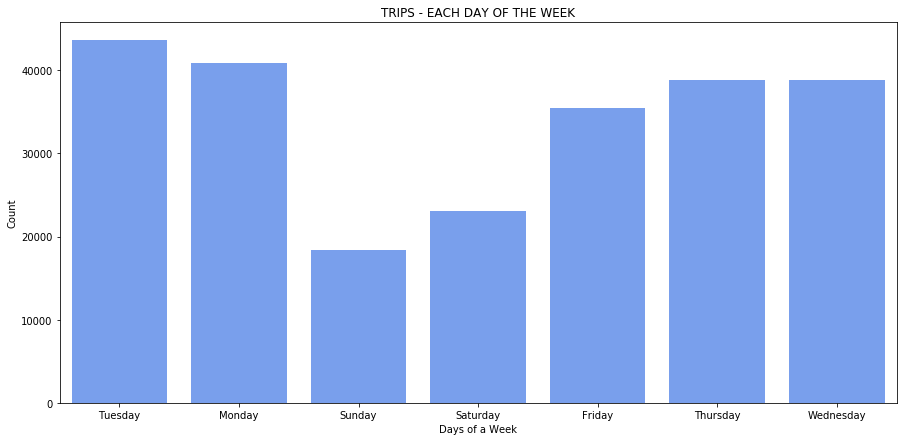

In [114]:
#figure2

plt.subplots(figsize = (15,7))
sns.countplot(data = new_df, x = 'day_of_week', color = '#6698FF')
plt.title('TRIPS - EACH DAY OF THE WEEK')
plt.xlabel('Days of a Week')
plt.ylabel('Count');

> **Most of the bike rides have been on Tuesday in the month of april. And secondly, Mondays have the most number of rides. We can also note that there were approximately equal rides on Wednesday and Thursday. And also, we see that the least number of rides were on Sundays!**

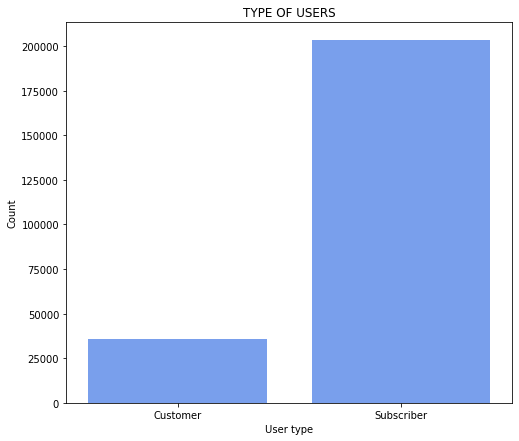

In [38]:
#figure3

plt.subplots(figsize = (8,7))
sns.countplot(data = new_df, x = 'user_type', color = '#6698FF')
plt.title('TYPE OF USERS')
plt.xlabel('User type')
plt.ylabel('Count');

> **Subscribers of 'Ford GoBike' seem to use the service of bike rides more than the Customers. This might be probably the subscribers were more used to the rides and found it comfortable than the normal customers!**

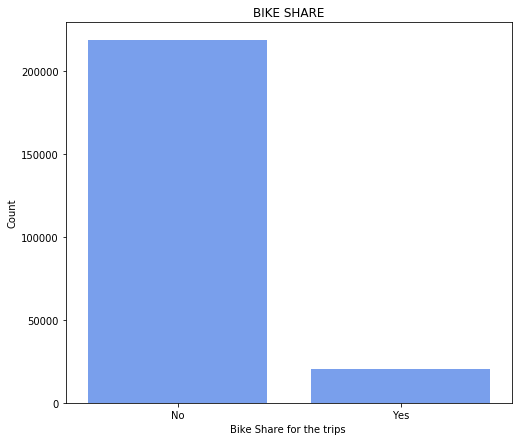

In [77]:
#figure4

plt.subplots(figsize = (8,7))
sns.countplot(data=new_df, x='bike_share_for_all_trip', color='#6698FF')
plt.title('BIKE SHARE')
plt.xlabel('Bike Share for the trips ')
plt.ylabel('Count');

> **Most of the users did not prefer bike share option. From the plot, it is clear that only a small fraction of the users were comfortable to share the rides!**

## Bivariate Exploration

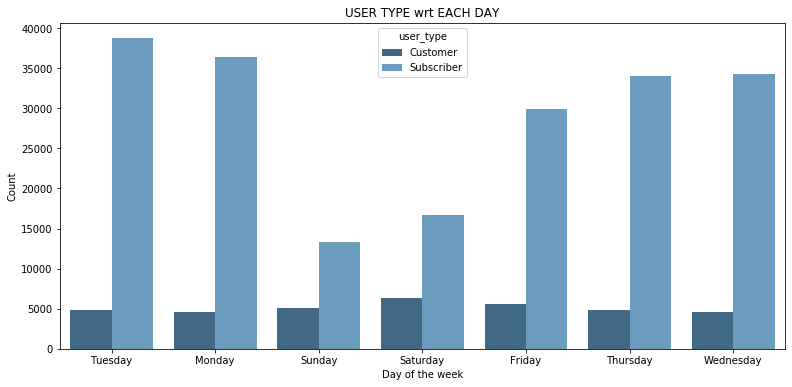

In [113]:
#figure5

plt.subplots(figsize = (13,6))
sns.countplot(data=new_df, x='day_of_week', hue='user_type', palette="Blues_d")
plt.title('USER TYPE wrt EACH DAY')
plt.xlabel('Day of the week')
plt.ylabel('Count');

> **As noticed already we can see from the plot, that most of the bike rides are on tuesday by the subsribers almost. We can also infer from the graph that the customers(those who use the bikes rarely) are interested to use the bike service preferably on Saturdays, may be for recreational purposes!**

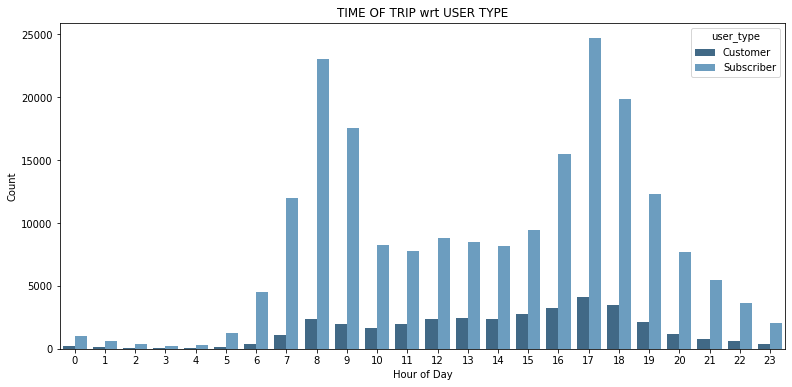

In [112]:
#figure6

plt.subplots(figsize = (13,6))
sns.countplot(data=new_df, x='trip_hour', hue='user_type', palette="Blues_d")
plt.title('TIME OF TRIP wrt USER TYPE')
plt.xlabel('Hour of Day')
plt.ylabel('Count');

> **Subscribers usage of the bikes is obviously at the rush hours when people go to work in the morning and off from work in the noon, this provides evidence that they use the service on the purpose of going to work. The customers tend to ride most in the noon or evenings.**

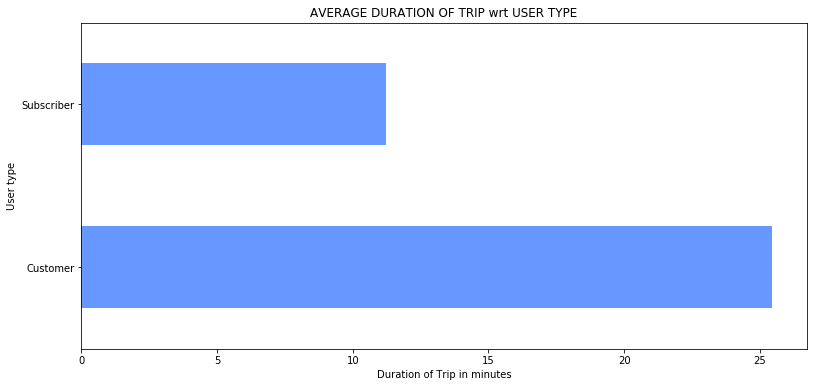

In [111]:
#figure7

avg = new_df.groupby('user_type')['trip_duration_minute'].mean().plot(kind='barh', color='#6698FF', figsize=(13,6))
avg.set_title('AVERAGE DURATION OF TRIP wrt USER TYPE')
avg.set_ylabel('User type',)
avg.set_xlabel('Duration of Trip in minutes');

> **We can find that the average trip duration of subscribers is nearly 12 minutes and the average trip duration of customers is nearly 26 minutes. This may be because most of the customers use the bike rides when they have to travel far!**

## Multivariate Exploration

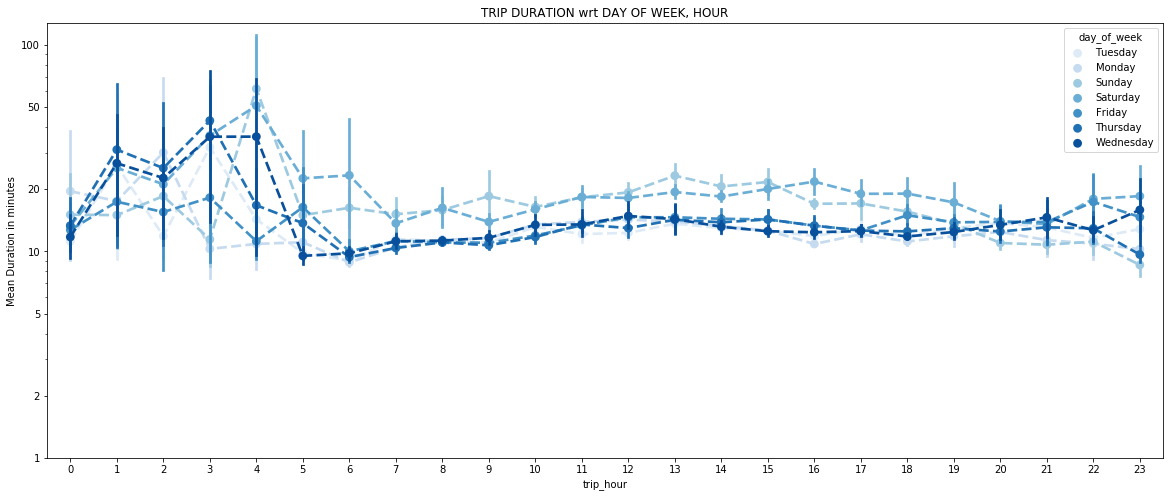

In [122]:
#figure8

plt.subplots(figsize = (20,8))
ax = sns.pointplot(data = new_df, x = 'trip_hour', y = 'trip_duration_minute', hue = 'day_of_week',palette = 'Blues', linestyles = '--')
plt.title('TRIP DURATION wrt DAY OF WEEK, HOUR')
plt.ylabel('Mean Duration in minutes')
plt.yscale('log')
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100])
ax.set_yticklabels([],minor = True);

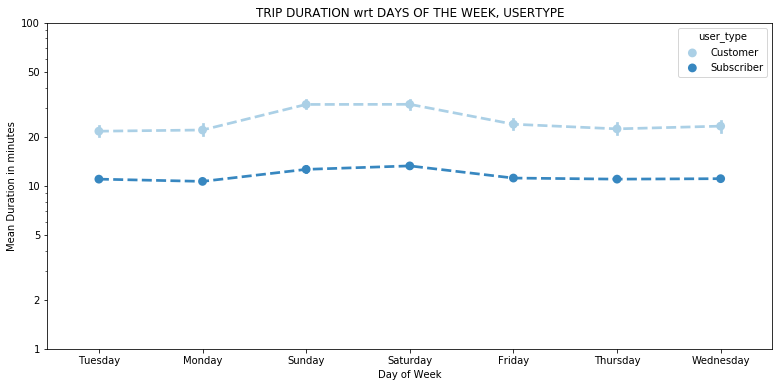

In [117]:
#figure9

plt.subplots(figsize = (13,6))
ax = sns.pointplot(data = new_df, x = 'day_of_week', y = 'trip_duration_minute', hue = 'user_type', palette = 'Blues', linestyles = '--')
plt.title('TRIP DURATION wrt DAYS OF THE WEEK, USERTYPE')
plt.ylabel('Mean Duration in minutes')
plt.xlabel('Day of Week')
plt.yscale('log')
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100])
ax.set_yticklabels([],minor = True);

> **It can be infered from the plot that subscribers ride much shorter or quicker trips compared to those of the customers on everyday of the week. The trend line seems to increase on weekends(Saturdays, Sundays) especially for customer user type (casual riders). The trend line of the Subscribers seem to be more efficient and consistent wrt average duration from Monday through Friday.**

# CONCLUSION

**As a result of exploration with the Ford GoBike System data, we have the following insights about the data:**

* Most of the bike rides are at 8.00 am in the morning and 5.00 pm at evenning, which obviously indicates that most of the people use this service for the purpose of work. 


* Most of those who use the bike rides for work purposes are found to be Subscribers. This is totally relatable because these Subscribers would gain some benefits and so that would help them with their everyday rides.


* As most of them use the service of bikes for work purposes, its evident that the usage of these bikes would be more consistent on the working days than on the weekends. 


* The people availing the bike rides preferably do not tend to do bike shares. 


* The Customer type users, ie. those who have not Subscribed for the GoBike service seem to utilize the service mostly on weekends and at evenings, which  may be for recreational purposes.


* The average duration of a Subscribe on a trip is nearly 12 minutes (subscribers prefer shorter/quicker rides) and the average duration of trip of a Customer is nearly 26 minutes(may be they are not in hurry like the subscribers who need to be at work on time).


* The Subscribe type users seem to use the bike service consistent and effective on the weekdays and the Customer type users seem to use the bike service most preferably on the weekends.